In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import scipy as sp

import seaborn as sns
sns.set(style='ticks', context='paper',
        rc={'font.size': 6, 
            'axes.titlesize': 7,
            'axes.labelsize': 7,
            'axes.labelpad': 2,
            'xtick.labelsize': 5,
            'ytick.labelsize': 5,
            'legend.title_fontsize' : 5.5,
            'legend.fontsize' : 5.5,
            'legend.markerscale': 0.5,
            'axes.spines.top': False,
            'axes.spines.right': False,
            'axes.linewidth': 0.4,
            'xtick.major.width': 0.4,
            'ytick.major.width': 0.4,
            'xtick.major.size': 2.5,
            'ytick.major.size': 2.5,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'xtick.minor.width': 0.2,
            'ytick.minor.width': 0.2,
            'figure.constrained_layout.use': True,
            'figure.dpi': 200})

id_columns = ['architecture', 'task', 'kind', 'source', 'layer']
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}


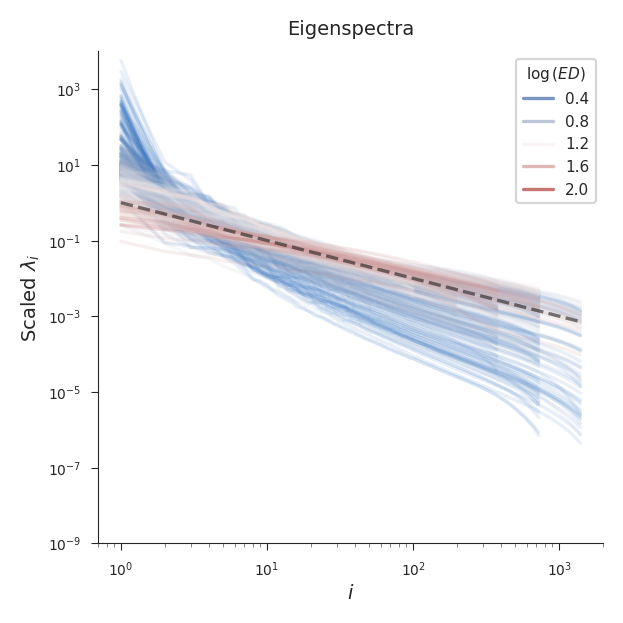

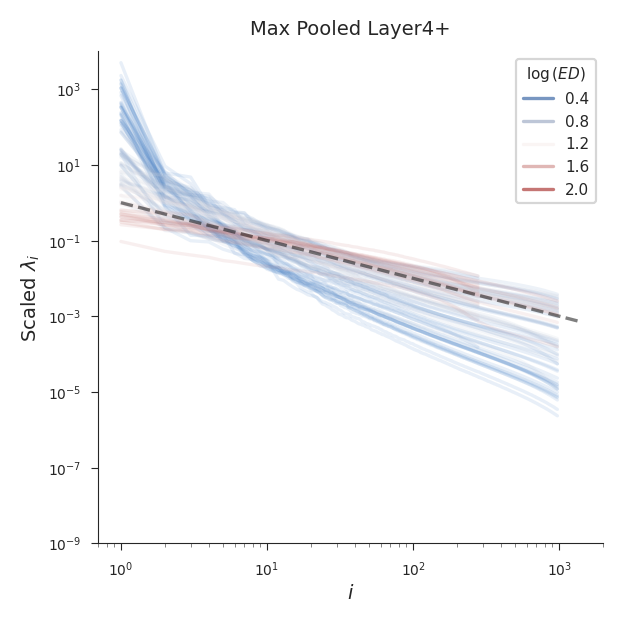

In [9]:
#Eric's plot
dataset = 'imagenet'
#results_marcc/reproductions/eigmetrics|dataset:imagenet|pooling:avg|grayscale:False.csv
#/home/wtownle1/encoder_dimensionality/results_marcc/reproductions/eigmetrics|dataset:imagenet|pooling:avg|grayscale:False.csv

data = pd.merge(pd.read_csv(f'../../../results_marcc/reproductions/eigspectra|dataset:{dataset}|pooling:True|grayscale:False.csv'),
                pd.read_csv(f'../../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'),
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data['id'] = data[id_columns].sum(axis='columns')

# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data['scaled_variance'] = scaled_var

# Log(ED)
data['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log', title='Eigenspectra')
ax.set_ylim(bottom=10**(-9), top=10**4)
ax.legend(title=r'$\log{(ED)}$')

#plt.savefig('saved/results_eigspectrum_vs_ed.png', dpi=300)
plt.show()


#last layers only
data40 = data[data['layer'] > 'layer3.6.relu']
outlier40 = data40.groupby(id_columns)['n'].transform(is_outlier)
data40 = data40[~outlier40]
scaled_var40 = data40.groupby(id_columns).apply(get_scaled_var)
scaled_var40 = scaled_var40.reset_index(id_columns, drop=True)
data40['scaled_variance'] = scaled_var40

fig, ax = plt.subplots(figsize=(3, 3))
sns.lineplot(data=data40, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log', title='Max Pooled Layer4+')
ax.set_ylim(bottom=10**(-9), top=10**4)
ax.legend(title=r'$\log{(ED)}$')
#plt.savefig('saved/results_eigspectrum_vs_ed.png', dpi=300)
plt.show()

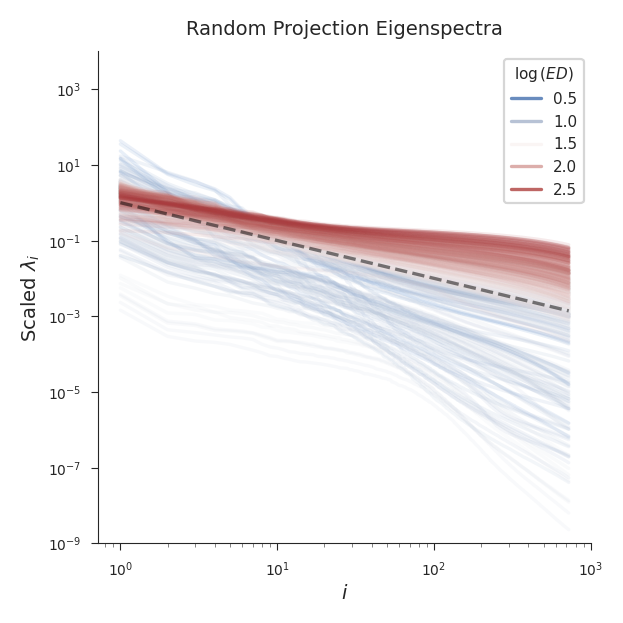

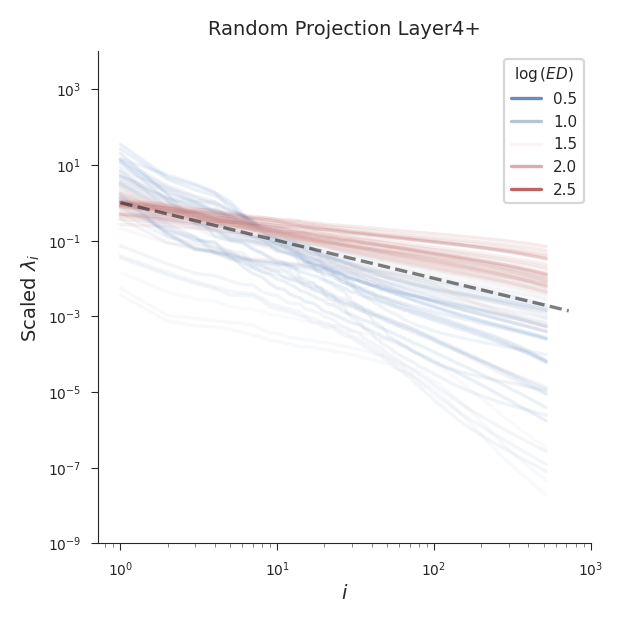

In [12]:
#No Pooling
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/eigspectra|dataset:{dataset}|pooling:False|grayscale:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'),
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data['id'] = data[id_columns].sum(axis='columns')

# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data['scaled_variance'] = scaled_var

# Log(ED)
data['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log', title='Random Projection Eigenspectra')
ax.set_ylim(bottom=10**(-9), top=10**4)
ax.legend(title=r'$\log{(ED)}$')

#plt.savefig('saved/results_eigspectrum_vs_ed.png', dpi=300)
plt.show()

#layers 4+
data40 = data[data['layer'] > 'layer3.6.relu']
outlier40 = data40.groupby(id_columns)['n'].transform(is_outlier)
data40 = data40[~outlier40]
scaled_var40 = data40.groupby(id_columns).apply(get_scaled_var)
scaled_var40 = scaled_var40.reset_index(id_columns, drop=True)
data40['scaled_variance'] = scaled_var40

fig, ax = plt.subplots(figsize=(3, 3))
sns.lineplot(data=data40, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log', title='Random Projection Layer4+')
ax.set_ylim(bottom=10**(-9), top=10**4)
ax.legend(title=r'$\log{(ED)}$')
#plt.savefig('saved/results_eigspectrum_vs_ed.png', dpi=300)
plt.show()

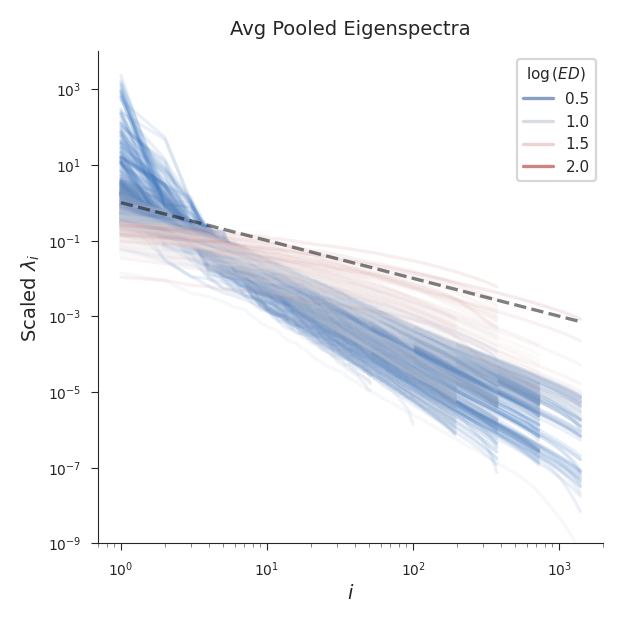

In [10]:
#Avg Pooling
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/eigspectra|dataset:{dataset}|pooling:avg|grayscale:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'),
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data['id'] = data[id_columns].sum(axis='columns')

# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data['scaled_variance'] = scaled_var

# Log(ED)
data['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log', title='Avg Pooled Eigenspectra')
ax.set_ylim(bottom=10**(-9), top=10**4)
ax.legend(title=r'$\log{(ED)}$')

#plt.savefig('saved/results_eigspectrum_vs_ed.png', dpi=300)
plt.show()



r_pooling=0.589


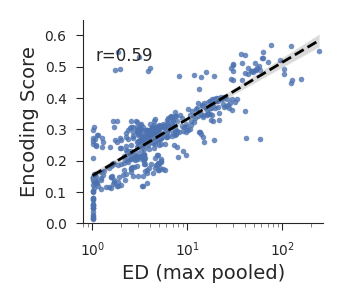

r_nopooling=0.553


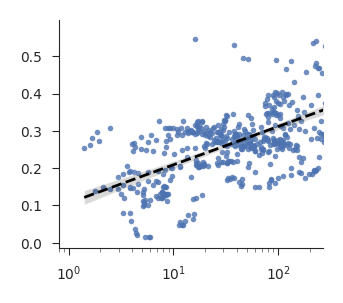

r_avgpooling=0.518


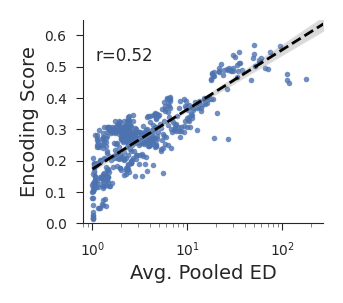

In [4]:
#Eric's ED to encoding score (with pooling, no pooling, and av pooling)
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

r_pool, p_pool = sp.stats.pearsonr(data['effective dimensionality'], data['score'])
print('r_pooling={:.3f}'.format(r_pool))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

ax.set_xlim(0.8, 270)
sns.regplot(data=data, x='effective dimensionality', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='ED (max pooled)', ylabel='Encoding Score', xscale='log')
ax.text(.05, .8, 'r={:.2f}'.format(r_pool), transform=ax.transAxes)
ax.set_ylim(bottom=0, top=0.65)
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()

#no pooling (for ed)
data_anone = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'), 
                on=id_columns)
data_anone.loc[:, 'layer'] = data_anone['layer'].replace(tf_to_pt_layer_map)

r_nopool, p_nopoolpool = sp.stats.pearsonr(data_anone['effective dimensionality'], data_anone['score'])
print('r_nopooling={:.3f}'.format(r_nopool))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

ax.set_xlim(0.8, 270)
sns.regplot(data=data_anone, x='effective dimensionality', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel=None, ylabel=None, xscale='log')
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()

#av pooling (ED)
data_aavg = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'), 
                on=id_columns)
data_aavg.loc[:, 'layer'] = data_aavg['layer'].replace(tf_to_pt_layer_map)

r_avpool, p_avpool = sp.stats.pearsonr(data_aavg['effective dimensionality'], data_aavg['score'])
print('r_avgpooling={:.3f}'.format(r_avpool))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

ax.set_xlim(0.8, 270)
sns.regplot(data=data_aavg, x='effective dimensionality', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='Avg. Pooled ED', ylabel='Encoding Score', xscale='log')
ax.text(.05, .8, 'r={:.2f}'.format(r_avpool), transform=ax.transAxes)
ax.set_ylim(bottom=0, top=0.65)
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()

r_pooling=-0.679


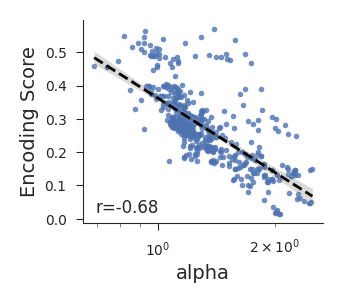

r_pooling^2=-0.586


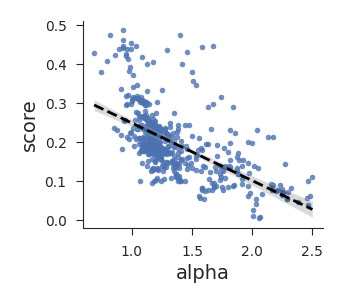

r_pooling=-0.514


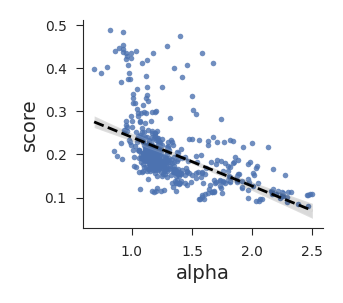

In [3]:
#alpha (with max pooling) to encoding score
#encoder with no max pooling, then with max pooling, then avg pooling
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

r_1, p_1 = sp.stats.pearsonr(data['alpha'], data['score'])
print('r_pooling={:.3f}'.format(r_1))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data, x='alpha', y='score',
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.text(.05, .05, 'r={:.2f}'.format(r_1), transform=ax.transAxes)
ax.set(xlabel='alpha', ylabel='Encoding Score', xscale='log')
#ax.set_ylim(bottom=0, top=0.65)


#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)

#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()
#'/home/wtownle1/encoder_dimensionality/results_marcc/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'


#pooling before encoding score
data_epooling = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:True.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'), 
                on=id_columns)
data_epooling.loc[:, 'layer'] = data_epooling['layer'].replace(tf_to_pt_layer_map)

r_2, p_2 = sp.stats.pearsonr(data_epooling['alpha'], data_epooling['score'])
print('r_pooling^2={:.3f}'.format(r_2))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_epooling, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


#average pooling for encoding score
data_eavpooling = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:avg.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'), 
                on=id_columns)
data_eavpooling.loc[:, 'layer'] = data_eavpooling['layer'].replace(tf_to_pt_layer_map)

r_3, p_3 = sp.stats.pearsonr(data_eavpooling['alpha'], data_eavpooling['score'])
print('r_pooling={:.3f}'.format(r_3))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_eavpooling, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


r_nopooling^2=-0.708


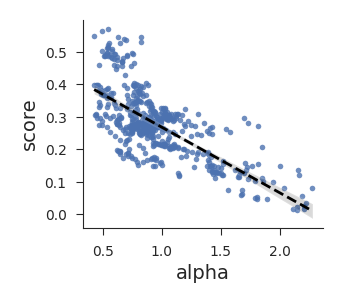

r_nopooling=-0.520


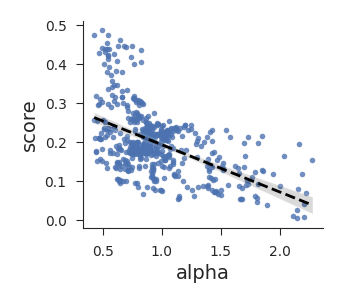

r_nopooling=-0.425


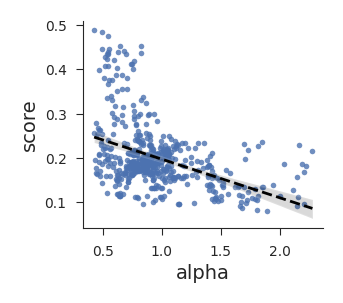

In [7]:
#alpha (no pooling) to encoding score
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

r_1, p_1 = sp.stats.pearsonr(data['alpha'], data['score'])
print('r_nopooling^2={:.3f}'.format(r_1))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)

#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()


#pooling before encoding score
data_epooling = pd.merge(pd.read_csv(f'../../results_marcc/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:True.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'), 
                on=id_columns)
data_epooling.loc[:, 'layer'] = data_epooling['layer'].replace(tf_to_pt_layer_map)

r_2, p_2 = sp.stats.pearsonr(data_epooling['alpha'], data_epooling['score'])
print('r_nopooling={:.3f}'.format(r_2))
fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_epooling, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


#average pooling for encoding score
data_eavpooling = pd.merge(pd.read_csv(f'../../results_marcc/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:avg.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'), 
                on=id_columns)
data_eavpooling.loc[:, 'layer'] = data_eavpooling['layer'].replace(tf_to_pt_layer_map)

r_3, p_3 = sp.stats.pearsonr(data_eavpooling['alpha'], data_eavpooling['score'])
print('r_nopooling={:.3f}'.format(r_3))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_eavpooling, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()

r_avgpooling=-0.821


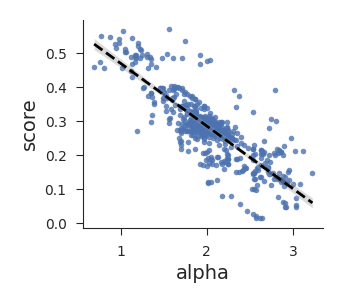

r_avgpooling=-0.723


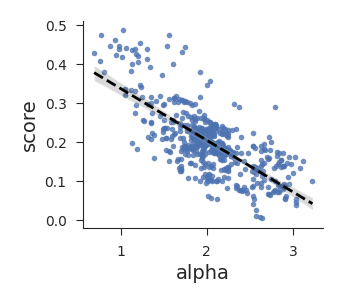

r_avgpooling^2=-0.776


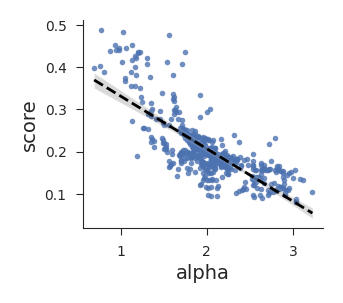

In [8]:
#alpha (avg pooling) to encoding score
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

r_1, p_1 = sp.stats.pearsonr(data['alpha'], data['score'])
print('r_avgpooling={:.3f}'.format(r_1))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)

#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()


#av pooling before encoding score
data_epooling = pd.merge(pd.read_csv(f'../../results_marcc/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:True.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'), 
                on=id_columns)
data_epooling.loc[:, 'layer'] = data_epooling['layer'].replace(tf_to_pt_layer_map)

r_2, p_2 = sp.stats.pearsonr(data_epooling['alpha'], data_epooling['score'])
print('r_avgpooling={:.3f}'.format(r_2))
fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_epooling, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


#average pooling for encoding score
data_eavpooling = pd.merge(pd.read_csv(f'../../results_marcc/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:avg.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'), 
                on=id_columns)
data_eavpooling.loc[:, 'layer'] = data_eavpooling['layer'].replace(tf_to_pt_layer_map)

r_3, p_3 = sp.stats.pearsonr(data_eavpooling['alpha'], data_eavpooling['score'])
print('r_avgpooling^2={:.3f}'.format(r_3))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_eavpooling, x='alpha', y='score', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()

r_pooling^2=-0.695


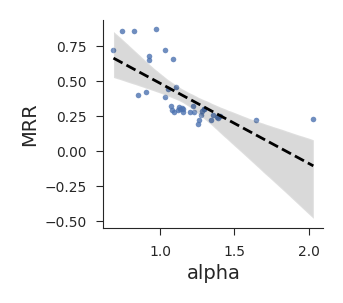

r_pooling=-0.854


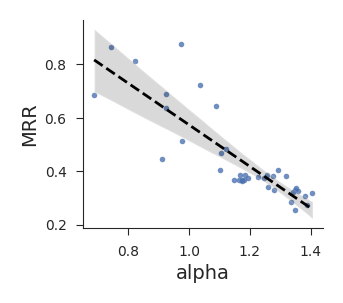

r_pooling=-0.835


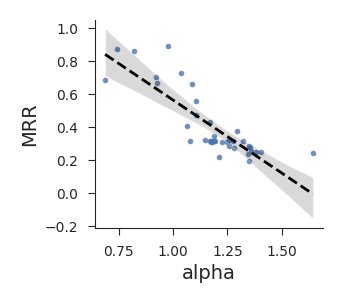

In [9]:
#alpha (with pooling) to classification
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:True.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

index = data.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data['MRR']
data_plot = data[index]

r_1, p_1 = sp.stats.pearsonr(data_plot['alpha'], data_plot['MRR'])
print('r_pooling^2={:.3f}'.format(r_1))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)

#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()


#no classification pooling
data_noc = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'), 
                on=id_columns)
data_noc.loc[:, 'layer'] = data_noc['layer'].replace(tf_to_pt_layer_map)

index = data_noc.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data_noc['MRR']
data_noc_plot = data_noc[index]

r_noc, p_noc = sp.stats.pearsonr(data_noc_plot['alpha'], data_noc_plot['MRR'])
print('r_pooling={:.3f}'.format(r_noc))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_noc_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


#avg classification pooling
data_avgc = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:avg.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'), 
                on=id_columns)
data_avgc.loc[:, 'layer'] = data_avgc['layer'].replace(tf_to_pt_layer_map)

index = data_avgc.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data_avgc['MRR']
data_avgc_plot = data_avgc[index]

r_avgc, p_avgc = sp.stats.pearsonr(data_avgc_plot['alpha'], data_avgc_plot['MRR'])
print('r_pooling={:.3f}'.format(r_avgc))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_avgc_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


r_nopooling=-0.644


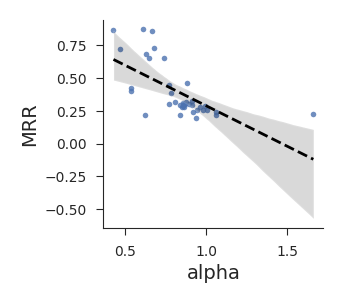

r_nopooling^2=-0.677


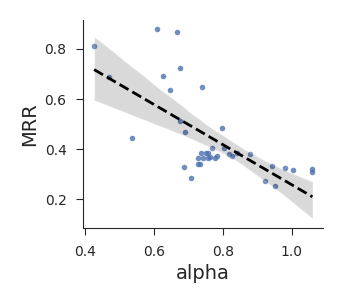

r_nopooling=-0.648


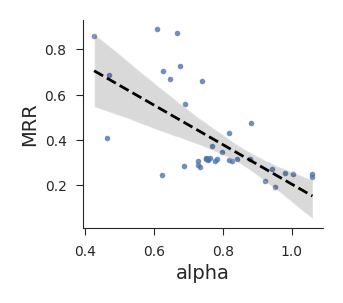

In [10]:
#alpha (no pooling) to classification
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:True.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

index = data.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data['MRR']
data_plot = data[index]

r_nopooling, p_nopooling = sp.stats.pearsonr(data_plot['alpha'], data_plot['MRR'])
print('r_nopooling={:.3f}'.format(r_nopooling))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)

#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()


#no classification pooling
data_noc = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'), 
                on=id_columns)
data_noc.loc[:, 'layer'] = data_noc['layer'].replace(tf_to_pt_layer_map)

index = data_noc.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data_noc['MRR']
data_noc_plot = data_noc[index]

r_noc, p_noc = sp.stats.pearsonr(data_noc_plot['alpha'], data_noc_plot['MRR'])
print('r_nopooling^2={:.3f}'.format(r_noc))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_noc_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


#avg classification pooling
data_avgc = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:avg.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'), 
                on=id_columns)
data_avgc.loc[:, 'layer'] = data_avgc['layer'].replace(tf_to_pt_layer_map)

index = data_avgc.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data_avgc['MRR']
data_avgc_plot = data_avgc[index]

r_avgc, p_avgc = sp.stats.pearsonr(data_avgc_plot['alpha'], data_avgc_plot['MRR'])
print('r_nopooling={:.3f}'.format(r_avgc))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_avgc_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()

r_avgpooling=-0.884


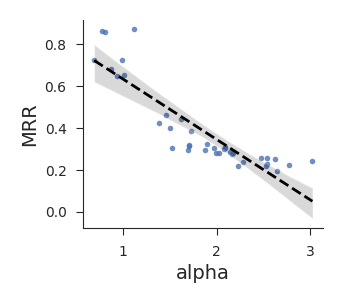

r_avgpooling=-0.892


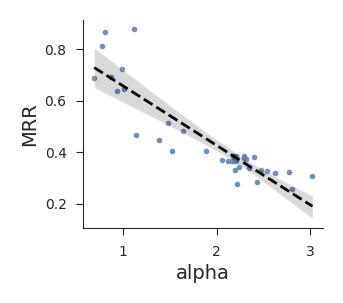

r_avgpooling^2=-0.904


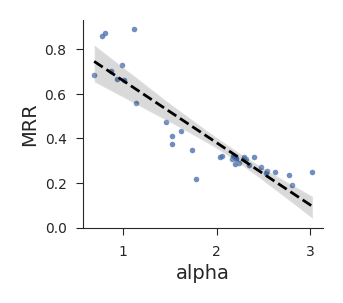

In [11]:
#alpha (avg pooling) to classification
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:True.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'), 
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

index = data.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data['MRR']
data_plot = data[index]

r_avgpooling, p_avgpooling = sp.stats.pearsonr(data_plot['alpha'], data_plot['MRR'])
print('r_avgpooling={:.3f}'.format(r_avgpooling))

fig, ax = plt.subplots(figsize=(1.6, 1.4))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
#annotate_corr(data, x='effective dimensionality', y='score', pos=(0.5, 0.2), ax=ax)

#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()


#no classification pooling
data_noc = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'), 
                on=id_columns)
data_noc.loc[:, 'layer'] = data_noc['layer'].replace(tf_to_pt_layer_map)

index = data_noc.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data_noc['MRR']
data_noc_plot = data_noc[index]

r_noc, p_noc = sp.stats.pearsonr(data_noc_plot['alpha'], data_noc_plot['MRR'])
print('r_avgpooling={:.3f}'.format(r_noc))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_noc_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()


#avg classification pooling
data_avgc = pd.merge(pd.read_csv(f'../../results_marcc/n-shot|dataset:imagenet21k|classifier:prototype|pooling:avg.csv'),
                pd.read_csv(f'../../results_marcc/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'), 
                on=id_columns)
data_avgc.loc[:, 'layer'] = data_avgc['layer'].replace(tf_to_pt_layer_map)

index = data_avgc.groupby(['architecture', 'kind', 'task'], sort=False)['MRR'].transform(max) == data_avgc['MRR']
data_avgc_plot = data_avgc[index]

r_avgc, p_avgc = sp.stats.pearsonr(data_avgc_plot['alpha'], data_avgc_plot['MRR'])
print('r_avgpooling^2={:.3f}'.format(r_avgc))

fig, ax = plt.subplots(figsize=(1.6, 1.4))
sns.regplot(data=data_avgc_plot, x='alpha', y='MRR', 
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
plt.show()

In [ ]:
dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results/eigspectra|dataset:{dataset}|pooling:True|grayscale:False.csv'),
                pd.read_csv(f'../../results/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'),
                on=id_columns)
#data = pd.merge(pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                on=id_columns)

data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data['id'] = data[id_columns].sum(axis='columns')

# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data['scaled_variance'] = scaled_var

# Log(ED)
data['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.savefig('saved_figs/results_eigspectrum_vs_ed.png', dpi=300)
plt.show()

In [ ]:
#unscaled variance

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.show()

In [ ]:
#dont remove outliers
#scaled v unscaled

#data2 = pd.merge(pd.read_csv(f'../../results/eigspectra|dataset:{dataset}|pooling:True|grayscale:False.csv'),
#                pd.read_csv(f'../../results/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'),
#                on=id_columns)
data2 = pd.merge(pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
                on=id_columns)

data2.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data2['id'] = data[id_columns].sum(axis='columns')

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data2.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data2['scaled_variance'] = scaled_var

# Log(ED)
data2['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data2, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.show()


fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data2, x='n', y='variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.show()

In [ ]:
#Pooling = False

dataset = 'imagenet'
data = pd.merge(pd.read_csv(f'../../results/eigspectra|dataset:{dataset}|pooling:False|grayscale:False.csv'),
                pd.read_csv(f'../../results/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'),
                on=id_columns)
#data = pd.merge(pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
#                on=id_columns)

data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data['id'] = data[id_columns].sum(axis='columns')

# Remove outlier low-variance points at the final PCs
def is_outlier(i):
    i = np.log(i)
    cutoff = 0.95 * i.iloc[-1]
    return i > cutoff
outlier = data.groupby(id_columns)['n'].transform(is_outlier)
data = data[~outlier]

# Set y-intercept to 1
def get_scaled_var(x):
    i, y = x['n'].values, x['variance'].values
    i, y = np.log(i), np.log(y)
    intercept = LinearRegression().fit(i.reshape(-1, 1), y).intercept_
    intercept = np.exp(intercept)
    return x['variance'] / intercept
scaled_var = data.groupby(id_columns).apply(get_scaled_var)
scaled_var = scaled_var.reset_index(id_columns, drop=True)
data['scaled_variance'] = scaled_var

# Log(ED)
data['log_ed'] = np.log10(data['effective dimensionality'])

fig, ax = plt.subplots(figsize=(3, 3))

sns.lineplot(data=data, x='n', y='scaled_variance', hue='log_ed',
             units='id', alpha=0.1, estimator=None,
             palette=sns.color_palette('vlag', as_cmap=True), ax=ax)
ax.plot([1, data.n.max()], [1, 1 / data.n.max()], linestyle='--', color='black', alpha=0.5)
ax.set(xlabel=r'$i$', ylabel=r'Scaled $\lambda_i$', xscale='log', yscale='log')

ax.legend(title=r'$\log{(ED)}$')

plt.savefig('saved_figs/eigspectrum_ed_nopooling.png', dpi=300)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

id_columns = ['architecture', 'task', 'kind', 'source', 'layer']
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}

data_gp = pd.merge(pd.read_csv('/home/wtownle1/encoder_dimensionality/results_marcc/eigmetrics|dataset:imagenet|pooling:True|grayscale:False.csv'),
                pd.read_csv(f'/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:True|grayscale:False.csv'),
                on=id_columns)
data_np = pd.merge(pd.read_csv('/home/wtownle1/encoder_dimensionality/results/eigmetrics|dataset:imagenet|pooling:False|grayscale:False.csv'),
                pd.read_csv('/home/wtownle1/encoder_dimensionality/results/eigspectra|dataset:imagenet|pooling:False|grayscale:False.csv'),
                on=id_columns)

alpha_gp = np.asarray(data_gp.loc[:,'alpha']).reshape(-1,1)
alpha_np = np.asarray(data_np.loc[:,'alpha']).reshape(-1,1)
plt.hist(alpha_gp)

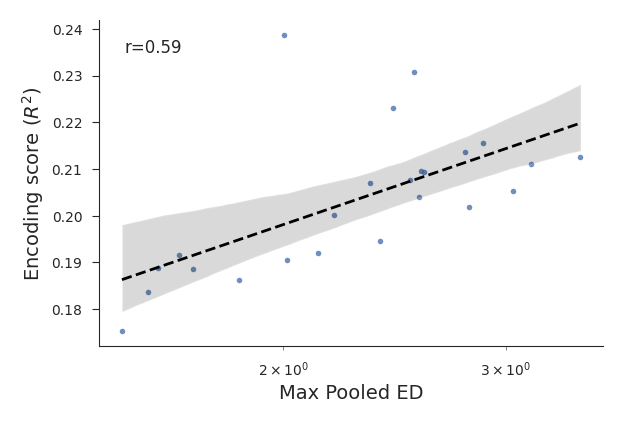

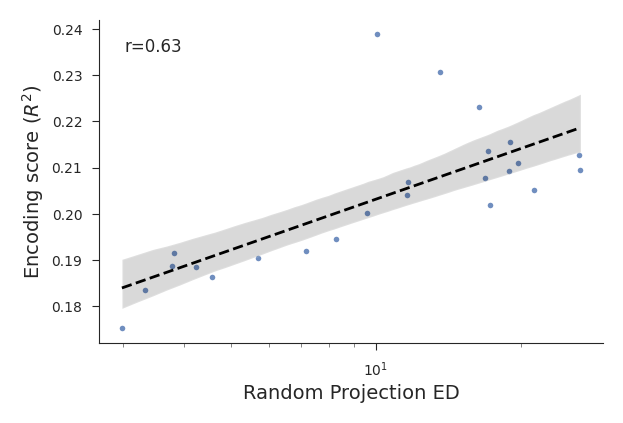

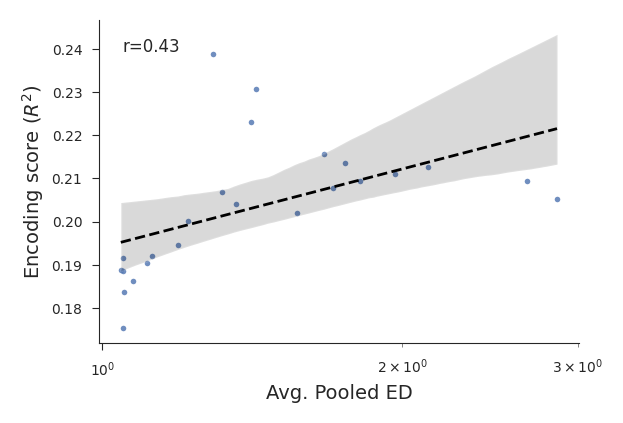

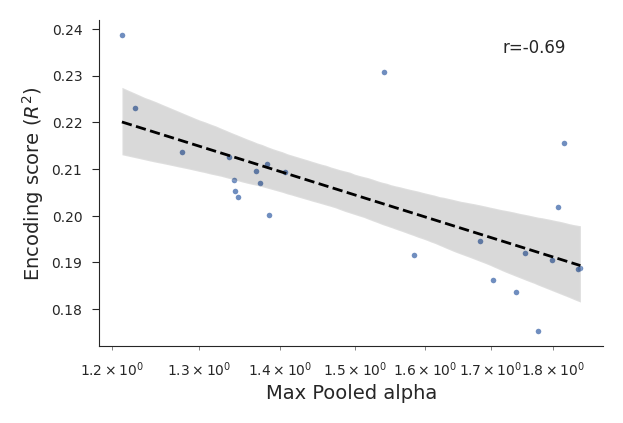

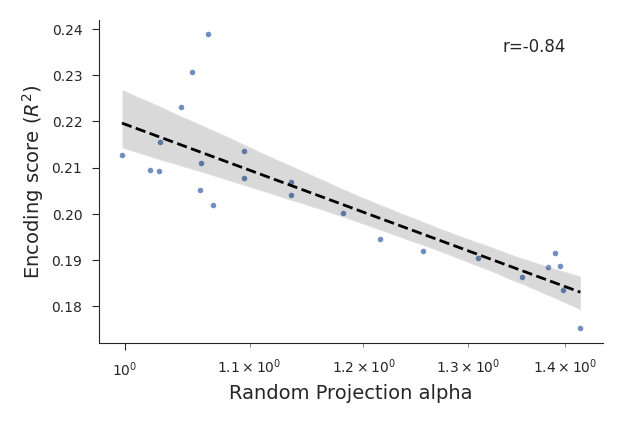

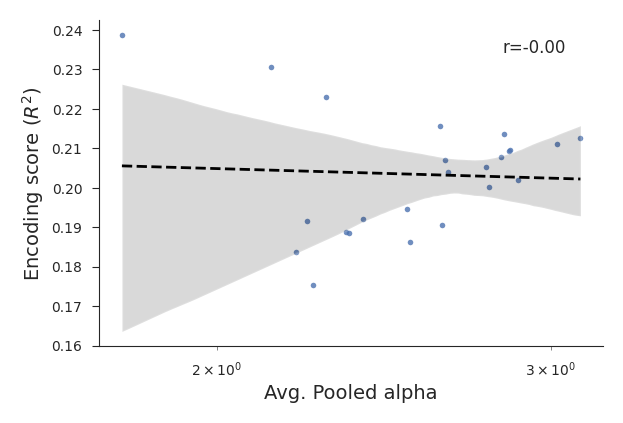

In [6]:
#random model encoding score
dataset = 'imagenet'

#max pooling
data = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'),
                on=id_columns)
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data = data[data['kind'] == 'Untrained']

r, p = sp.stats.pearsonr(data['effective dimensionality'], data['score'])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data, x='effective dimensionality', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='Max Pooled ED', ylabel=r'Encoding score ($R^2$)', xscale='log')
ax.text(.05, .9, 'r={:.2f}'.format(r), transform=ax.transAxes)
#ax.set_ylim(bottom=0, top=0.65)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()

#no pooling
data_np = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'),
                on=id_columns)
data_np.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data_np = data_np[data_np['kind'] == 'Untrained']

r_np, p_np = sp.stats.pearsonr(data_np['effective dimensionality'], data_np['score'])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data_np, x='effective dimensionality', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='Random Projection ED', ylabel=r'Encoding score ($R^2$)', xscale='log')
ax.text(.05, .9, 'r={:.2f}'.format(r_np), transform=ax.transAxes)
#ax.set_ylim(bottom=0, top=0.65)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()

#avg pooling
data_ap = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'),
                on=id_columns)
data_ap.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
data_ap = data_ap[data_ap['kind'] == 'Untrained']

r_ap, p_ap = sp.stats.pearsonr(data_ap['effective dimensionality'], data_ap['score'])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

#ax.set_xlim(0.8, 270)
sns.regplot(data=data_ap, x='effective dimensionality', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='Avg. Pooled ED', ylabel=r'Encoding score ($R^2$)', xscale='log')
ax.text(.05, .9, 'r={:.2f}'.format(r_ap), transform=ax.transAxes)
#ax.set_ylim(bottom=0, top=0.65)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()


#encoding score & alpha
#max pooling
#data = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
#                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:True|grayscale:False.csv'),
#                on=id_columns)
#data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
#data = data[data['kind'] == 'Untrained']

r, p = sp.stats.pearsonr(data['alpha'], data['score'])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

#ax.set_xlim(0.4, 3.5)
sns.regplot(data=data, x='alpha', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='Max Pooled alpha', ylabel=r'Encoding score ($R^2$)', xscale='log')
ax.text(.8, .9, 'r={:.2f}'.format(r), transform=ax.transAxes)
#ax.set_ylim(bottom=0, top=0.65)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()

#no pooling
#data_np = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
#                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:False|grayscale:False.csv'),
#                on=id_columns)
#data_np.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
#data_np = data_np[data_np['kind'] == 'Untrained']

r_np, p_np = sp.stats.pearsonr(data_np['alpha'], data_np['score'])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

#ax.set_xlim(0.4, 3.5)
sns.regplot(data=data_np, x='alpha', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='Random Projection alpha', ylabel=r'Encoding score ($R^2$)', xscale='log')
ax.text(.8, .9, 'r={:.2f}'.format(r_np), transform=ax.transAxes)
#ax.set_ylim(bottom=0, top=0.65)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()

#avg pooling
#data_ap = pd.merge(pd.read_csv(f'../../results_marcc/reproductions/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
#                pd.read_csv(f'../../results_marcc/reproductions/eigmetrics|dataset:{dataset}|pooling:avg|grayscale:False.csv'),
#                on=id_columns)
#data_ap.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)
#data_ap = data_ap[data_ap['kind'] == 'Untrained']

r_ap, p_ap = sp.stats.pearsonr(data_ap['alpha'], data_ap['score'])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

#ax.set_xlim(0.4, 3.5)
sns.regplot(data=data_ap, x='alpha', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 4, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='Avg. Pooled alpha', ylabel=r'Encoding score ($R^2$)', xscale='log')
ax.text(.8, .9, 'r={:.2f}'.format(r_ap), transform=ax.transAxes)
#ax.set_ylim(bottom=0, top=0.65)
#plt.savefig('saved/results_ED-vs-encoding-all.png', dpi=300)
plt.show()